In [105]:
from sklearn import datasets
import numpy as np

## Loading Iris dataset

iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))
c = "teste"

Class labels: [0 1 2]


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1, stratify=y
)


teste


In [107]:
print("labels count in y: ", np.bincount(y))

print("labels counts in y_train: ", np.bincount(y_train))

print("labels counts in y_train: ", np.bincount(y_test))


labels count in y:  [50 50 50]
labels counts in y_train:  [35 35 35]
labels counts in y_train:  [15 15 15]


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)

In [109]:
from sklearn.linear_model import Perceptron


ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [110]:
y_pred = ppn.predict(x_test_std)
print(  'missclassified examples : %d' % (y_test != y_pred).sum())


missclassified examples : 1


In [111]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

## Function that plot a certain amount of data receiving two index ( x and y) and a test idx to amostration

def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min() -1, x[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')


        if test_idx:
            x_test, y_test = x[test_idx, :], y[test_idx]

            plt.scatter(x_test[:, 0], x_test[:, 1], c='grey', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    

Accuracy: 0.978


In [ ]:
from  sklearn.metrics import accuracy_score

print("Accuracy: %.3f" %accuracy_score(y_test, y_pred))

C:\Users\felip\AppData\Local\Temp\ipykernel_552\2234856668.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 0],


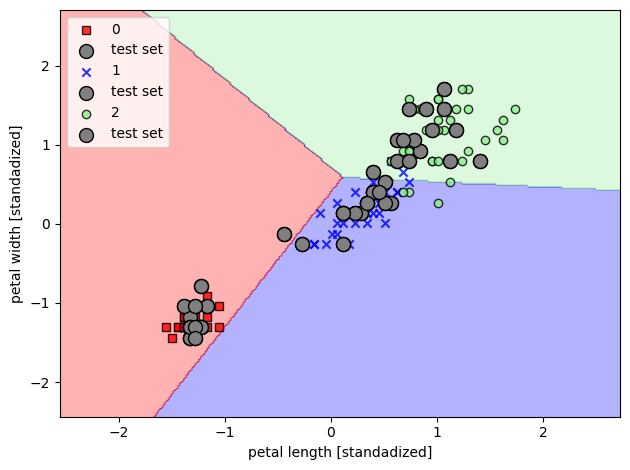

In [113]:
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x=x_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

# defining plot labels
plt.xlabel('petal length [standadized]')
plt.ylabel('petal width [standadized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
